In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Reshape
from keras.optimizers import Adam

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
n_input = 784
n_hidden = 98
n_output = n_input
lr = 0.001
n_epochs = 10

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(100, activation='selu'))
model.add(Dense(30, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(784, activation='sigmoid'))
model.add(Reshape((28,28)))

optimizer = Adam(learning_rate = lr)
model.compile(optimizer = optimizer, loss="mse")

In [ ]:
X_train_s = X_train/255.0
history = model.fit(X_train_s, X_train_s, epochs = n_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 3ms/step - loss: 0.0261 - val_loss: 0.0170
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0132 - val_loss: 0.0126
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0119 - val_loss: 0.0114
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0098 - val_loss: 0.0098
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 9/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.009

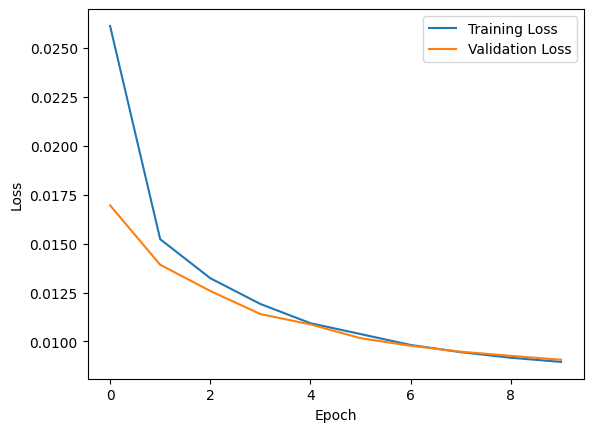

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape = (28,28)))
model2.add(Dense(100, weights = model.layers[1].get_weights()))

model2.compile()

In [ ]:
X_latente = model2.predict(X_train_s)
print(X_latente)

1875/1875 [==============================] - 2s 1ms/step
[[ 0.8684155   3.2613332   0.16260615 ...  2.647481    2.5709028
   0.03021   ]
 [ 2.7952178   3.3886137   0.9997988  ...  2.8681757   2.2191992
  -5.466012  ]
 [ 2.2350926  -0.09725583  1.1662427  ...  1.0885069  -1.1317029
  -4.659813  ]
 ...
 [ 1.7724372   3.711804    1.6329459  ...  1.4824364  -1.2313924
  -1.8279591 ]
 [ 1.4258105   4.6569514   0.47699955 ...  2.8958642   1.412847
  -1.4982506 ]
 [ 1.5788443   1.8029981  -0.16027817 ...  0.9688754   1.7915934
   1.6107762 ]]


In [ ]:
e = X_latente[1]
e = np.expand_dims(e, axis=0)
latent_vectors = model2.predict(X_train)

1875/1875 [==============================] - 2s 1ms/step


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_validas = tsne.fit_transform(latent_vectors)

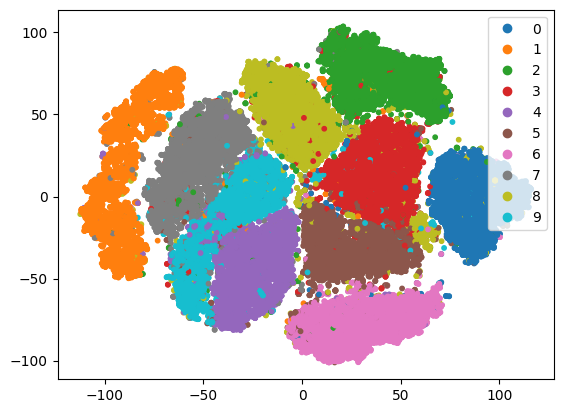

In [ ]:
scatter = plt.scatter(X_validas[:, 0], X_validas[:, 1], c=y_train, s=10, cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.show()